In [1]:
# Importing Requuird Libraries
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import adjusted_rand_score

In [2]:
# Loading dataset
iris = load_iris()
print("Dataset:\n",iris)

Dataset:
 {'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0

In [3]:
# Rows and Columns
rows,cols=iris.data.shape
print("Rows :",rows)
print("Columns :",cols)
print("Columns Names :",iris.feature_names)

Rows : 150
Columns : 4
Columns Names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# Standarding Data
scaler=StandardScaler()
X =scaler .fit_transform(iris.data)
Y = iris.target

In [5]:
# Apply DBSCAN
db = DBSCAN(eps=0.6, min_samples=5)
labels = db.fit_predict(X)

In [6]:
# Labels
#labels = db.labels_
print("Cluster labels for each point:")
print(labels)

Cluster labels for each point:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [7]:
# ARI for DBSCAN
ari_score = adjusted_rand_score(Y, labels)
print(f"Adjusted Rand Index (ARI): {ari_score}")

Adjusted Rand Index (ARI): 0.4706267335681117


In [8]:
# Reduce dimensions for visualization
X_pca = PCA(n_components=2).fit_transform(X)

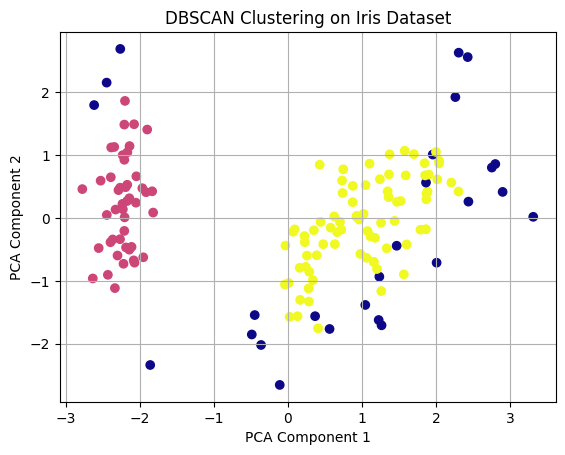

In [9]:
# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering on Iris Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [12]:
# Predictions
#new_sample = np.array([[6.4, 2.4, 5.0, 1.5]])          # Cluster : 1
new_sample = np.array([[4.5, 3.0, 1.5, 0.2]])           # Cluster : 0
#new_sample = np.array([[40, 3.0,200, 0.2]])           # Cluster : -1 (Noise)


new_sample = scaler.transform(new_sample)

# Combine with original data and re-fit DBSCAN temporarily
X_temp = np.vstack([X, new_sample])

Predictons = DBSCAN(eps=0.6, min_samples=5).fit_predict(X_temp)
print("Predicted Cluster:", Predictons[-1])

Predicted Cluster: 0
